# Finding Nemo !

Importing libraries :

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Open the training image for the model and display it. Then, convert it to HSV and display the colorful parts of the fish's body.


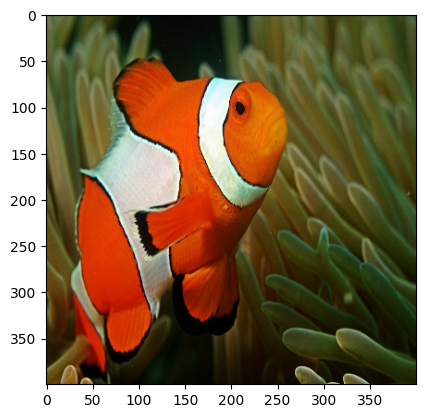

In [98]:
image = cv2.imread("input/nemo.jpg")
# image = cv2.resize(image, (0,0),fx=0.25 , fy=0.25)
image = cv2.resize(image, (400,400))
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_rgb_pix_list = image_rgb.reshape(-1,3)
plt.imshow(image_rgb)
plt.show()

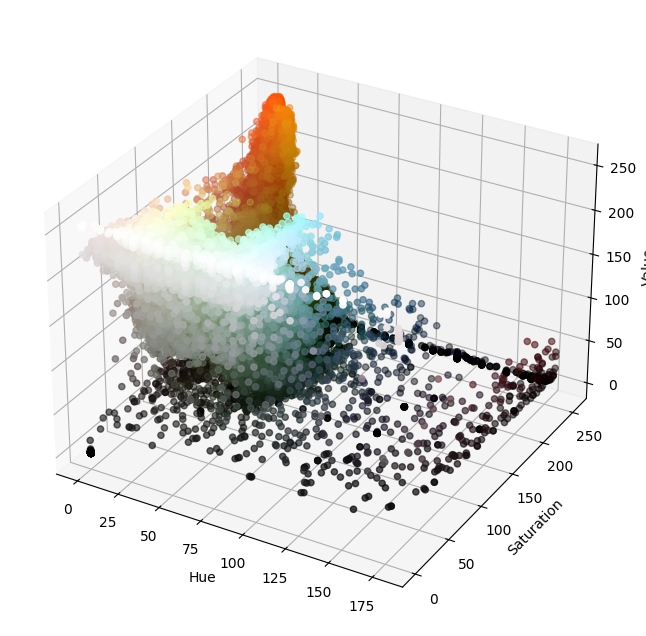

In [99]:
image_hsv = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")
image_hsv_pix_list = image_hsv.reshape(-1,3)
ax.scatter(image_hsv_pix_list[::,0],image_hsv_pix_list[::,1],image_hsv_pix_list[::,2],c=image_rgb_pix_list/255)
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")
plt.show()

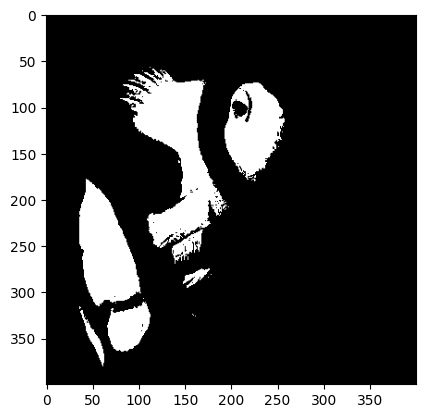

In [100]:
light_color_orange = (1,190,200)
dark_color_orange = (18,255,255)
mask_orange = cv2.inRange(image_hsv,light_color_orange,dark_color_orange)
plt.imshow(mask_orange,cmap="gray")
plt.show()

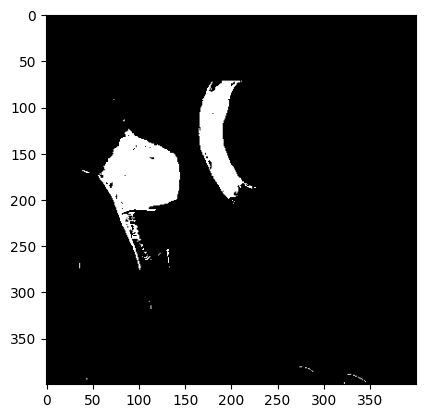

In [101]:
light_color_white = (0,0,200)
dark_color_white = (145,60,255)
mask_white = cv2.inRange(image_hsv,light_color_white,dark_color_white)
plt.imshow(mask_white,cmap="gray")
plt.show()

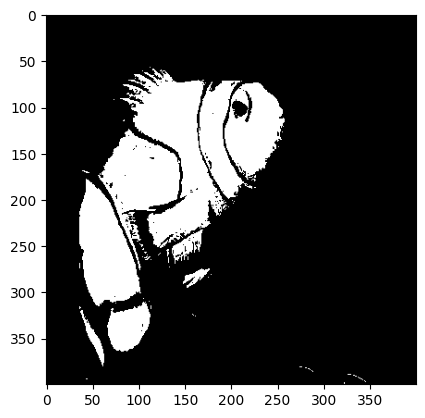

In [102]:
final_mask = cv2.add(mask_orange , mask_white)
plt.imshow(final_mask,"gray")
plt.show()

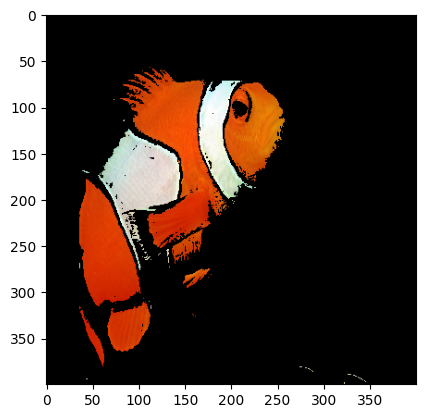

In [103]:
final_result = cv2.bitwise_and(image_rgb,image_rgb,mask=final_mask)
plt.imshow(final_result)
plt.show()

Starting machine learning with the KNN method:

In [82]:
X_train = image_hsv_pix_list / 255
X_train.shape

(160000, 3)

In [83]:
Y_train = final_mask.reshape(-1,) // 255
Y_train.shape

(160000,)

In [ ]:
knn = KNN(3)
knn.fit(X_train,Y_train)

Input the first test image:

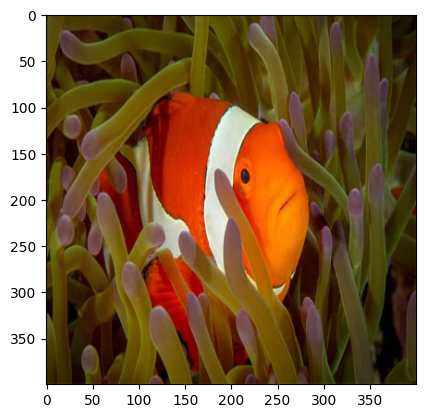

In [85]:
image_test = cv2.imread("input\dashe-nemo.jpg")
# image_test = cv2.resize(image_test,(0,0),fx=0.25,fy=0.25)
image_test = cv2.resize(image_test,(400,400))
image_test_rgb = cv2.cvtColor(image_test, cv2.COLOR_BGR2RGB)
plt.imshow(image_test_rgb)
plt.show() 

In [86]:
image_test_hsv = cv2.cvtColor(image_test_rgb , cv2.COLOR_RGB2HSV)
image_test_hsv_pix_list = image_test_hsv.reshape(-1,3)
X_test = image_test_hsv_pix_list / 255
X_test

array([[0.05490196, 0.30196078, 0.3372549 ],
       [0.07843137, 0.47843137, 0.29411765],
       [0.09411765, 0.49019608, 0.37647059],
       ...,
       [0.05882353, 0.84313725, 0.22745098],
       [0.05882353, 0.80392157, 0.21960784],
       [0.0627451 , 0.67058824, 0.23921569]])

In [87]:
Y_pred = knn.predict(X_test)

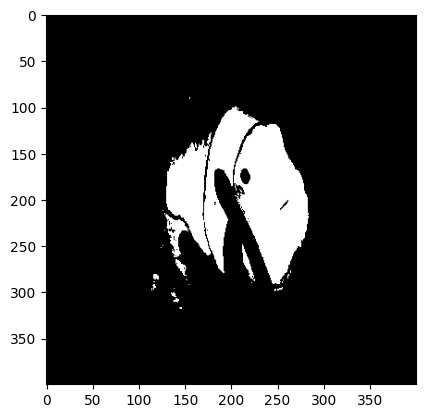

In [88]:
output = Y_pred.reshape(image_test.shape[:2])
plt.imshow(output,cmap="gray")
plt.show()

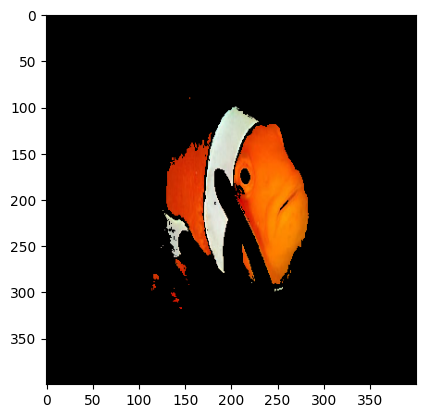

In [89]:
output_rgb = cv2.bitwise_and(image_test_rgb,image_test_rgb,mask=output)
plt.imshow(output_rgb)
plt.show()

Calculating the confusion matrix:

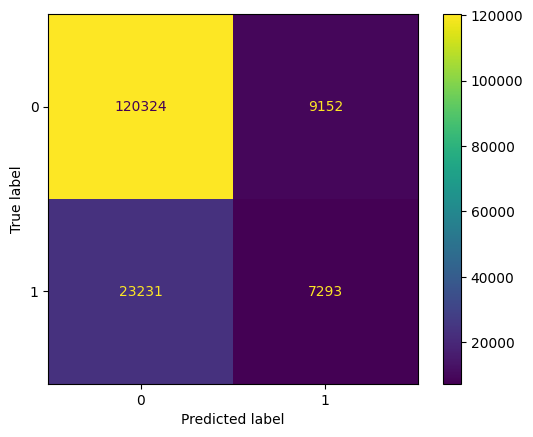

In [ ]:
y_true = Y_train
y_pred = Y_pred
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

Input the second test image:

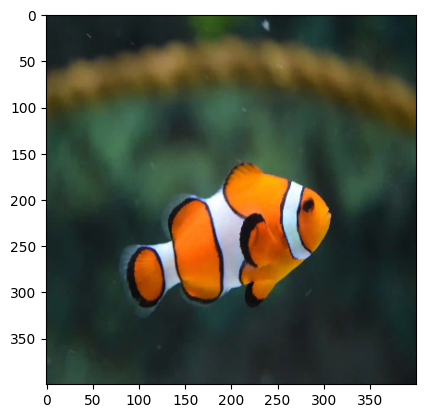

In [ ]:
image_test_2 = cv2.imread("input/abjie-nemo.jpg")
# image_test_2 = cv2.resize(image_test_2,(0,0),fx=0.25,fy=0.25)
image_test_2 = cv2.resize(image_test_2,(400,400))
image_test_2_rgb = cv2.cvtColor(image_test_2,cv2.COLOR_BGR2RGB)
plt.imshow(image_test_2_rgb)
plt.show()

In [92]:
image_test_2_hsv = cv2.cvtColor(image_test_2_rgb,cv2.COLOR_RGB2HSV)
image_test_2_hsv_pix_list = image_test_2_hsv.reshape(-1,3)
X_test = image_test_2_hsv_pix_list / 255
Y_pred = knn.predict(X_test)


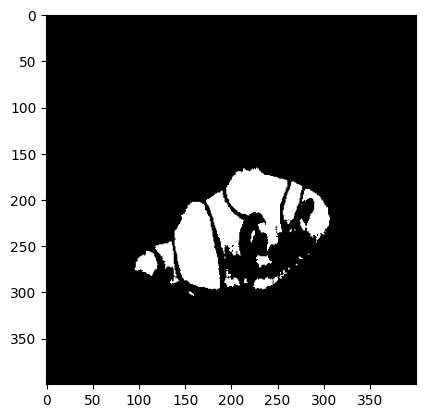

In [93]:
output = Y_pred.reshape(image_test_2.shape[:2])
plt.imshow(output,cmap="gray")
plt.show()

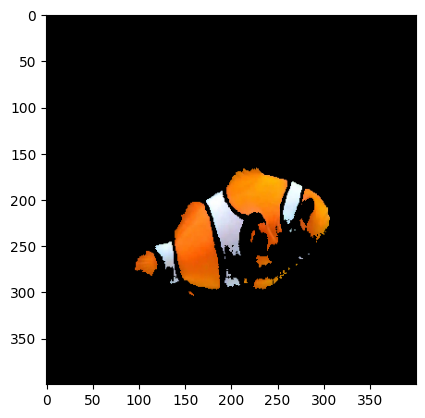

In [94]:
output_rgb = cv2.bitwise_and(image_test_2_rgb,image_test_2_rgb,mask=output)
plt.imshow(output_rgb)
plt.show()

Calculating the confusion matrix:

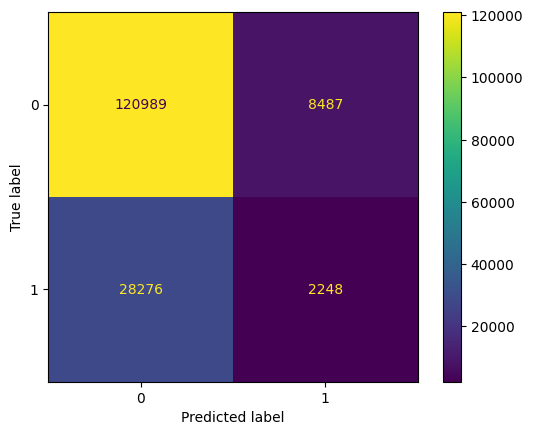

In [ ]:
y_true = Y_train
y_pred = Y_pred
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()